In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jitomates_df = pd.read_csv('../../data/jitomates.csv') 

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5,6,7,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
cols2drop = []
ignore_cols = ['Severidad del Problema']

for row in jitomates_df:
    if jitomates_df[row].dtype == "object" and row not in ignore_cols:
        cols2drop.append(row)

clean_df = jitomates_df.drop(cols2drop, 1)
cols2drop.clear()

for column in clean_df.columns:
    column_data = clean_df[column]
    isna_cd = column_data.isna()
    if isna_cd.describe()["top"]:
        cols2drop.append(column)
    else:
        clean_df[column] = clean_df[column].fillna(0)

clean_df = clean_df.drop(cols2drop, 1)


In [4]:
daño_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Daño"]
controle_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Controle"]
equilibrio_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Equilibrio"]

<AxesSubplot:>

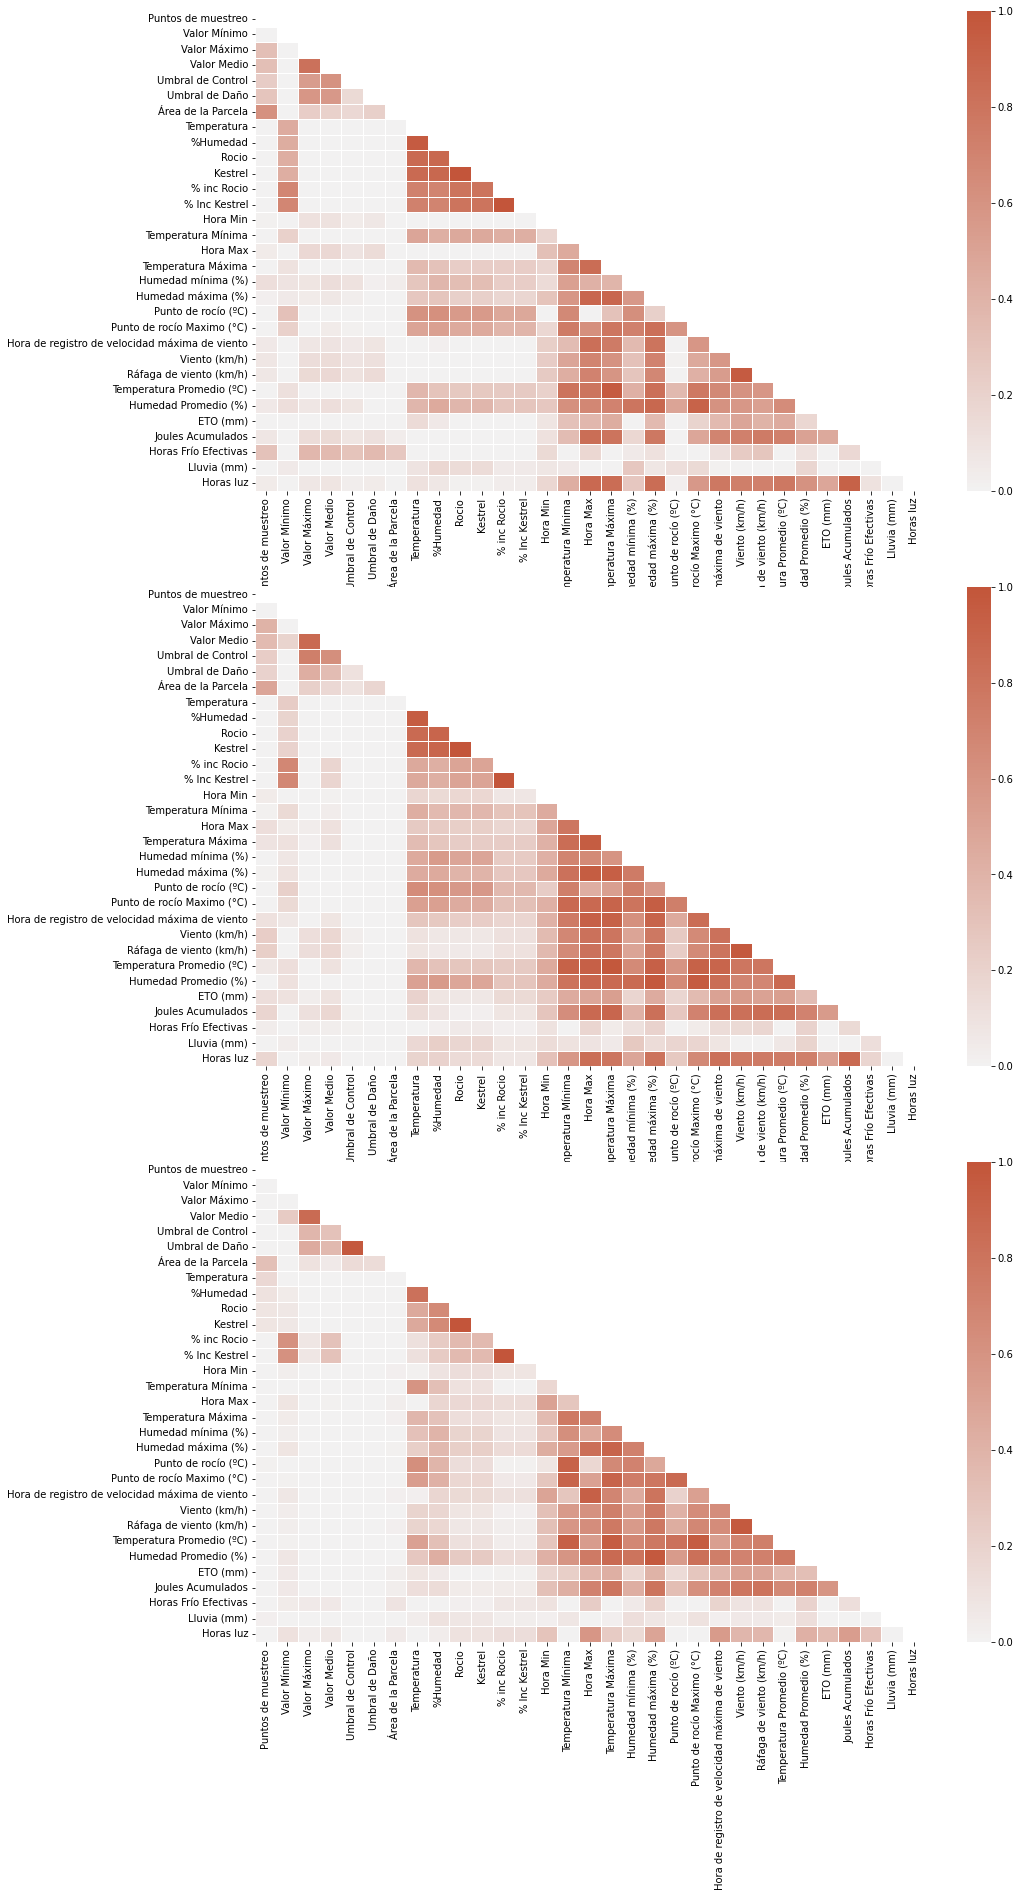

In [5]:
# Set up the matplotlib figure
f, ax = plt.subplots(3, 1, figsize=(15, 30))

daño_df_corr = daño_df.corr()
controle_df_corr = controle_df.corr()
equilibrio_df_corr = equilibrio_df.corr()

# Generate a mask for the upper triangle
mask_daño = np.triu(np.ones_like(daño_df_corr, dtype=bool))
mask_controle = np.triu(np.ones_like(controle_df_corr, dtype=bool))
mask_equilibrio = np.triu(np.ones_like(equilibrio_df_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(daño_df_corr, mask=mask_daño, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[0])
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(controle_df_corr, mask=mask_controle, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[1])
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(equilibrio_df_corr, mask=mask_equilibrio, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[2])

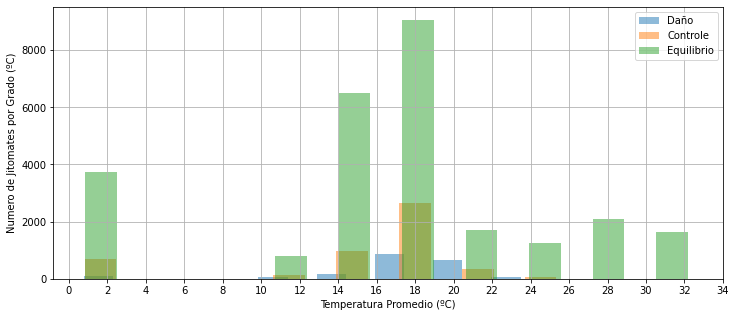

In [133]:
fig, ax = plt.subplots(figsize=(12, 5))

damage_temp = daño_df['Temperatura Promedio (ºC)']
contrl_temp = controle_df['Temperatura Promedio (ºC)']
equilb_temp = equilibrio_df['Temperatura Promedio (ºC)']

damage_temp.hist(alpha=0.5,rwidth=.5, ax=ax)
contrl_temp.hist(alpha=0.5,rwidth=.5, ax=ax)
equilb_temp.hist(alpha=0.5, rwidth=.5, ax=ax)

ax.legend(["Daño", "Controle", "Equilibrio"])
ax.set_xticks(np.arange(35, step=2))
ax.set_ylabel("Numero de Jitomates por Grado (ºC)")
ax.set_xlabel("Temperatura Promedio (ºC)")
plt.show()


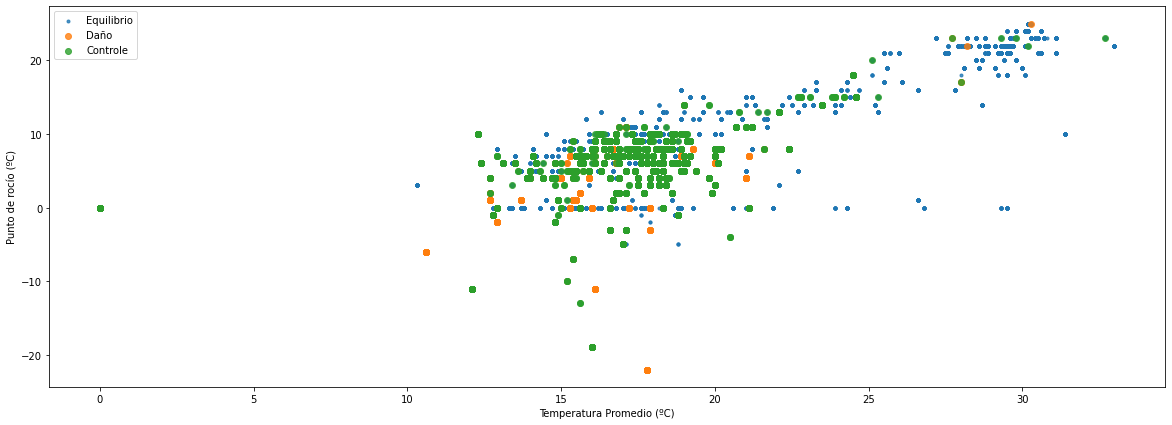

In [197]:
# Scatter entre punto de rocio y temperatura promedio
fig, ax = plt.subplots(figsize=(20, 7))


def df_scatter(df, ax, marker):
    df_temp = df['Temperatura Promedio (ºC)']
    df_pr = df['Punto de rocío (ºC)']
    ax.scatter(df_temp, df_pr, alpha=.8, marker=marker)

df_scatter(equilibrio_df, ax, ".")
df_scatter(daño_df, ax, ".")
df_scatter(controle_df, ax, ".")
ax.legend(["Equilibrio", "Daño", "Controle"])
ax.set_ylabel('Punto de rocío (ºC)')
ax.set_xlabel("Temperatura Promedio (ºC)")
plt.show()
